In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Define the conversion dictionaries for each column
slope_conversion = {-1: 15, 0: 30, 1: 45}
load_conversion = {-1: 0, 0: 2, 1: 4}
direction_conversion = {-1: 0, 0: 90, 1: 180}

# Read the CSV file
file_path = 'CCF_Matrix.csv'
df = pd.read_csv(file_path)

df['SLOPE'] = df['SLOPE'].map(slope_conversion)
df['LOAD'] = df['LOAD'].map(load_conversion)
df['DIRECTION'] = df['DIRECTION'].map(direction_conversion)

# Save the modified DataFrame to a new CSV file
output_file_path = 'Mod_CCF_Matrix.csv'
df.to_csv(output_file_path, index=False)

print(f"Conversion completed. Modified data saved to '{output_file_path}'.")


Conversion completed. Modified data saved to 'Mod_CCF_Matrix.csv'.


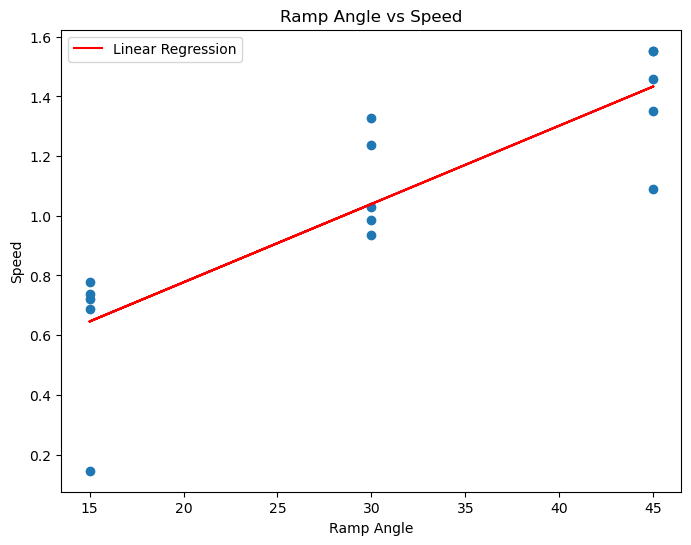

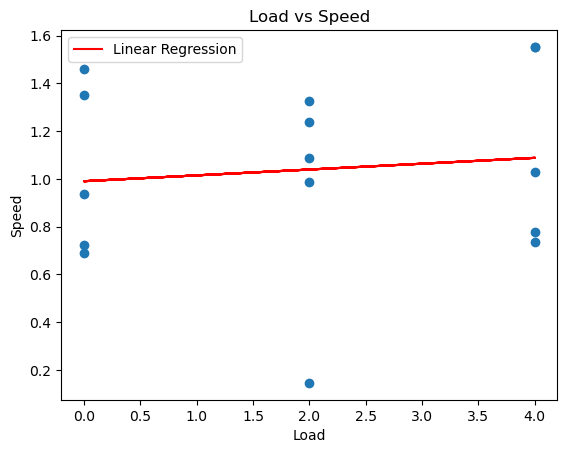

[0.04869449 0.25080165 0.20133964]


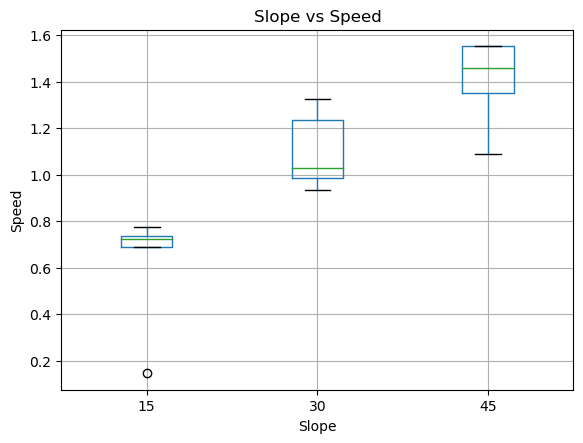

[0.62907958 0.25080165 0.77659574]


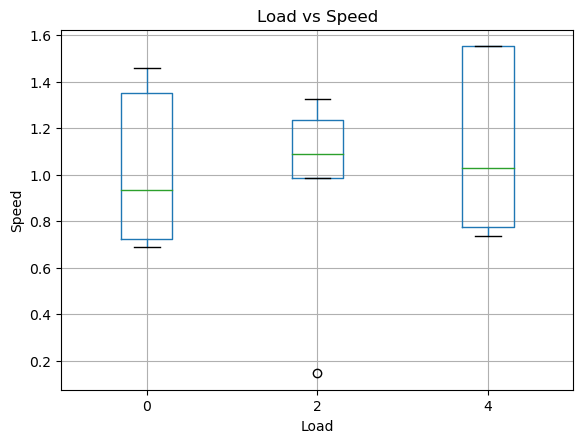

[0.72262626 0.09227158 0.57525611]


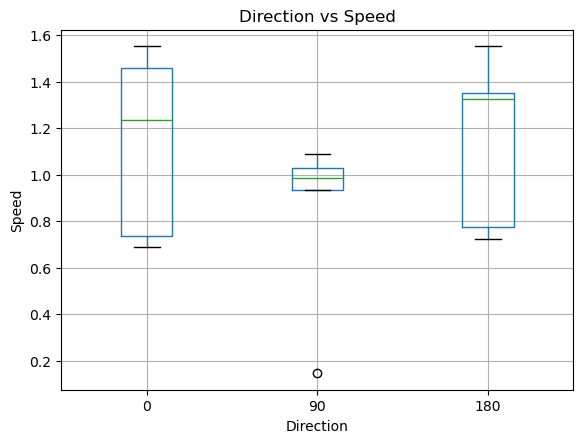

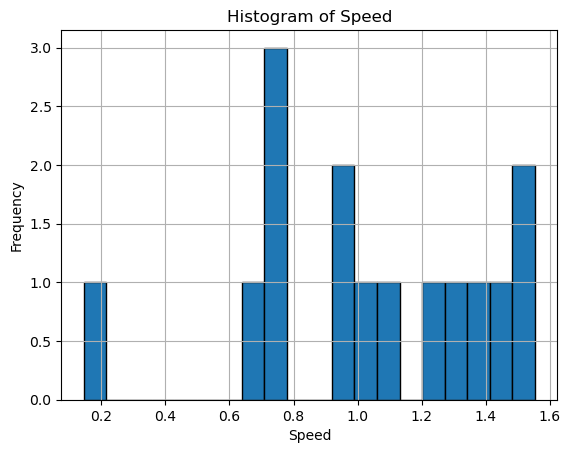

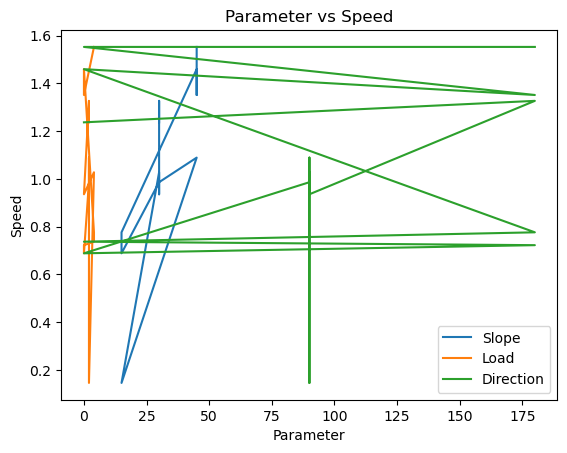

In [22]:
file_path = 'Mod_CCF_Matrix.csv'
df = pd.read_csv(file_path)

# Plot the data as a normal plot
plt.figure(figsize=(8, 6))

# Scatterplot of Ramp Angle
plt.scatter(df['SLOPE'], df['SPEED'])
plt.xlabel('Ramp Angle')
plt.ylabel('Speed')
plt.title('Ramp Angle vs Speed')

slope, intercept = np.polyfit(df['SLOPE'], df['SPEED'], 1)
regression_line = slope * df['SLOPE'] + intercept

# Plot the regression line
plt.plot(df['SLOPE'], regression_line, color='red', label='Linear Regression')

plt.legend()
plt.show()

# Scatterplot of Load values
plt.scatter(df['LOAD'], df['SPEED'])
plt.xlabel('Load')
plt.ylabel('Speed')
plt.title('Load vs Speed')

slope, intercept = np.polyfit(df['LOAD'], df['SPEED'], 1)
regression_line = slope * df['LOAD'] + intercept

# Plot the regression line
plt.plot(df['LOAD'], regression_line, color='red', label='Linear Regression')

plt.legend()
plt.show()

# Box plots for each parameter vs. speed
df.boxplot(column='SPEED', by='SLOPE')
plt.title('Slope vs Speed')
plt.suptitle('')  # Suppress the redundant title
plt.xlabel('Slope')
plt.ylabel('Speed')

grouped_data = df.groupby('SLOPE')['SPEED']
q1 = grouped_data.quantile(0.25).values
q3 = grouped_data.quantile(0.75).values
iqr = q3 - q1
print(iqr)

plt.grid(True)
plt.show()

df.boxplot(column='SPEED', by='LOAD')
plt.title('Load vs Speed')
plt.suptitle('')
plt.xlabel('Load')
plt.ylabel('Speed')

grouped_data = df.groupby('LOAD')['SPEED']
q1 = grouped_data.quantile(0.25).values
q3 = grouped_data.quantile(0.75).values
iqr = q3 - q1
print(iqr)

plt.grid(True)
plt.show()

df.boxplot(column='SPEED', by='DIRECTION')
plt.title('Direction vs Speed')
plt.suptitle('')
plt.xlabel('Direction')
plt.ylabel('Speed')

grouped_data = df.groupby('DIRECTION')['SPEED']
q1 = grouped_data.quantile(0.25).values
q3 = grouped_data.quantile(0.75).values
iqr = q3 - q1
print(iqr)

plt.grid(True)
plt.show()

# Histogram of the SPEED column
plt.hist(df['SPEED'], bins=20, edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Speed')
plt.grid(True)
plt.show()


# Plot the data as a normal plot
plt.plot(df['SLOPE'], df['SPEED'], label='Slope')
plt.plot(df['LOAD'], df['SPEED'], label='Load')
plt.plot(df['DIRECTION'], df['SPEED'], label='Direction')
plt.xlabel('Parameter')
plt.ylabel('Speed')
plt.title('Parameter vs Speed')
plt.legend()
plt.show()

